In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import sys
import torch
sys.path.append('../')
from gans.gan import train_D_independent

In [5]:
# here only one epoch for demonstrating purposes. One could set more epochs or use pretrained discriminator.
G, D = train_D_independent.train('weights/netG_epoch_199.pth', device='cuda', nc=3, dim_z=100, ngf=64, ndf=64, image_size=32, batch_size=128,
          lr=2e-4, lr_decay = [30, 50], epoch_number=1,
          verbose=5)

Files already downloaded and verified
Start
[0/0][0/391]	Loss_D: 1.4296	Fake score: 0.617266	Real score: 0.825934, AR: 0.391262
[0/0][5/391]	Loss_D: 1.3704	Fake score: 0.510572	Real score: 0.648764, AR: 0.576845
[0/0][10/391]	Loss_D: 1.1546	Fake score: 0.417672	Real score: 0.627334, AR: 0.465397
[0/0][15/391]	Loss_D: 1.0855	Fake score: 0.297401	Real score: 0.555957, AR: 0.394067
[0/0][20/391]	Loss_D: 0.9963	Fake score: 0.344109	Real score: 0.698687, AR: 0.300876
[0/0][25/391]	Loss_D: 0.7968	Fake score: 0.305999	Real score: 0.753725, AR: 0.188411
[0/0][30/391]	Loss_D: 0.6149	Fake score: 0.205537	Real score: 0.735123, AR: 0.139098
[0/0][35/391]	Loss_D: 0.6646	Fake score: 0.302175	Real score: 0.792982, AR: 0.163394
[0/0][40/391]	Loss_D: 0.5597	Fake score: 0.259872	Real score: 0.813745, AR: 0.116623
[0/0][45/391]	Loss_D: 0.5712	Fake score: 0.264366	Real score: 0.813050, AR: 0.124763
[0/0][50/391]	Loss_D: 0.5323	Fake score: 0.217359	Real score: 0.789952, AR: 0.096457
[0/0][55/391]	Loss_D: 0

In [6]:
import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

batch_size = 128
image_size=32
dataset = dset.CIFAR10(root='./data', download=True,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                           ]))

dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

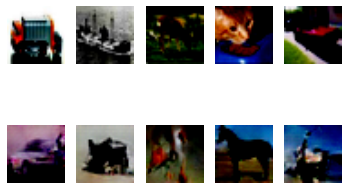

In [7]:
batch_size = 5
latent_size = 100

fixed_noise = torch.randn(batch_size, latent_size, 1, 1)
if torch.cuda.is_available():
    fixed_noise = fixed_noise.cuda()
fake_images = G(fixed_noise)

true_images =  next(iter(dataloader))[0][:batch_size]
true_images = true_images.cpu().detach().numpy()
true_images = true_images.reshape(true_images.shape[0], 3, 32, 32)
true_images = true_images.transpose((0, 2, 3, 1))

# z = torch.randn(batch_size, latent_size).cuda()
# z = Variable(z)
# fake_images = G(z)

fake_images_np = fake_images.cpu().detach().numpy()
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 3, 32, 32)
fake_images_np = fake_images_np.transpose((0, 2, 3, 1))
R, C = 2, 5
for i in range(2 * batch_size):
    if i // batch_size == 0:
        images = true_images
    if i // batch_size == 1:
        images = fake_images_np
    plt.subplot(R, C, i + 1)
    plt.imshow(images[i % batch_size], interpolation='bilinear')
    plt.axis('off')

plt.show()